##  Python常用流程控制

“流程控制”指的是运行程序时，控制一段代码是否运行、以及运行的顺序。

常用的流程控制方法包括：

1. 条件判断
2. 条件循环
3. 错误捕捉

###  课程目标

本节课结束后，同学们会掌握：

    1. Python常用流程控制方法

###  条件判断

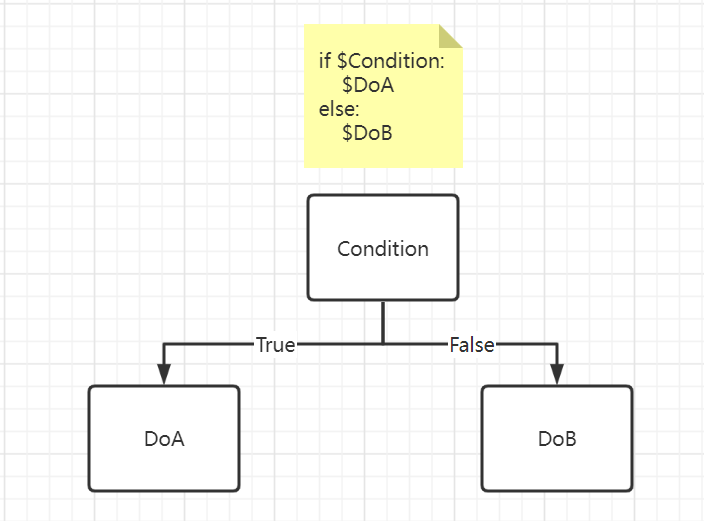
在Python中，条件判断是通过```if...else...```语句实现的。其中，`if`后紧跟需要判断的条件，若条件为真，则执行`if`下代码块，否则执行`else`下代码块。若该条件不为布尔类型，则会被自动转化成布尔类型。

In [1]:
flag = True
if flag:
    print('flag True')
else:
    print('flag False')

flag True


In [4]:
flag = 0 # 整数0对应的布尔值为False
if flag:
    print('flag True')
else:
    print('flag False')

flag False


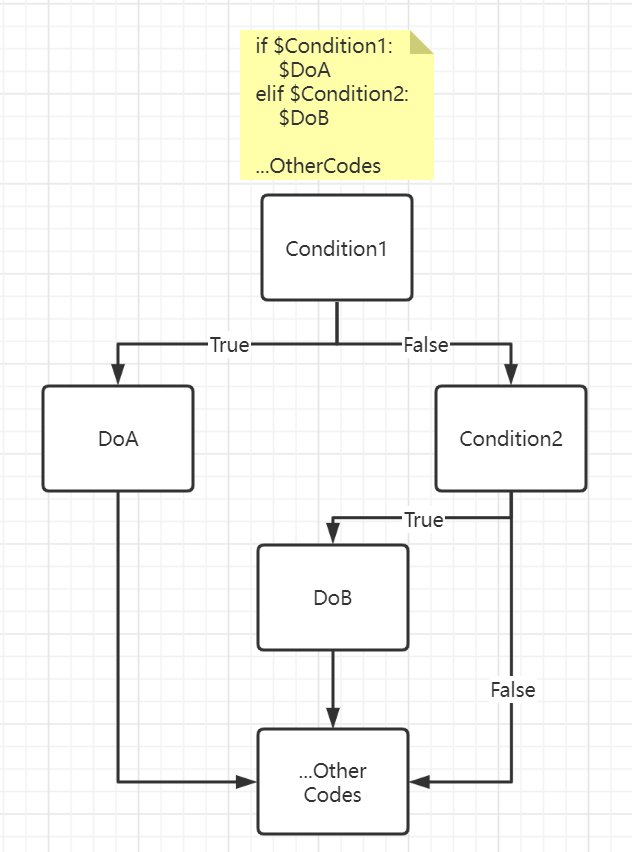
除了`if...else...`，Python还支持多重条件判断，通过`if...elif...`来实现。`elif...`可以看作`else: if...`的简写。

In [6]:
num = 2
if num==0:
    print('num is 0')
elif num==1:
    print('num is 1')
elif num==2:
    print('num is 2')

num is 2


### 条件循环

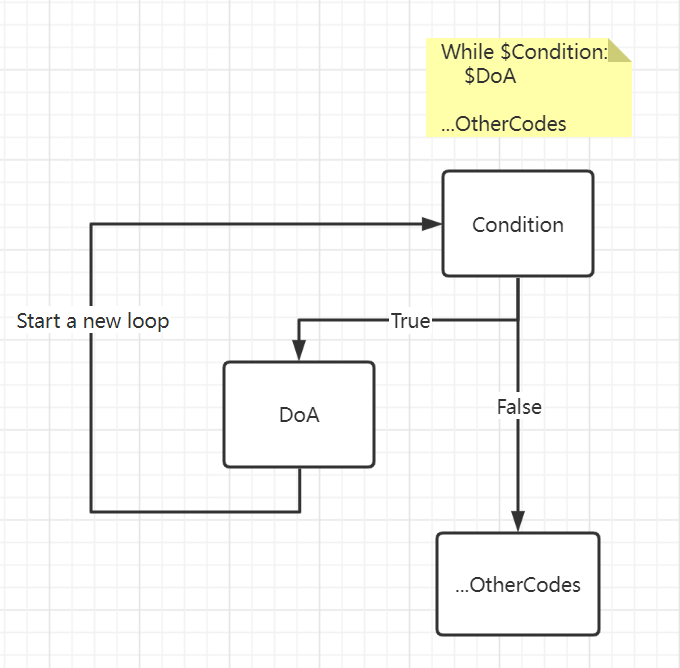

条件循环用于以下场景：当满足某个条件/不满足某个条件时，反复执行同一段代码。Python中通过```while...```来实现。`while`后紧跟需要判断的条件，若条件为真，则反复执行。

In [11]:
count = 0
while count<5:
    print('count is less than 5')
    count += 1
    print(count)

count is less than 5
1
count is less than 5
2
count is less than 5
3
count is less than 5
4
count is less than 5
5


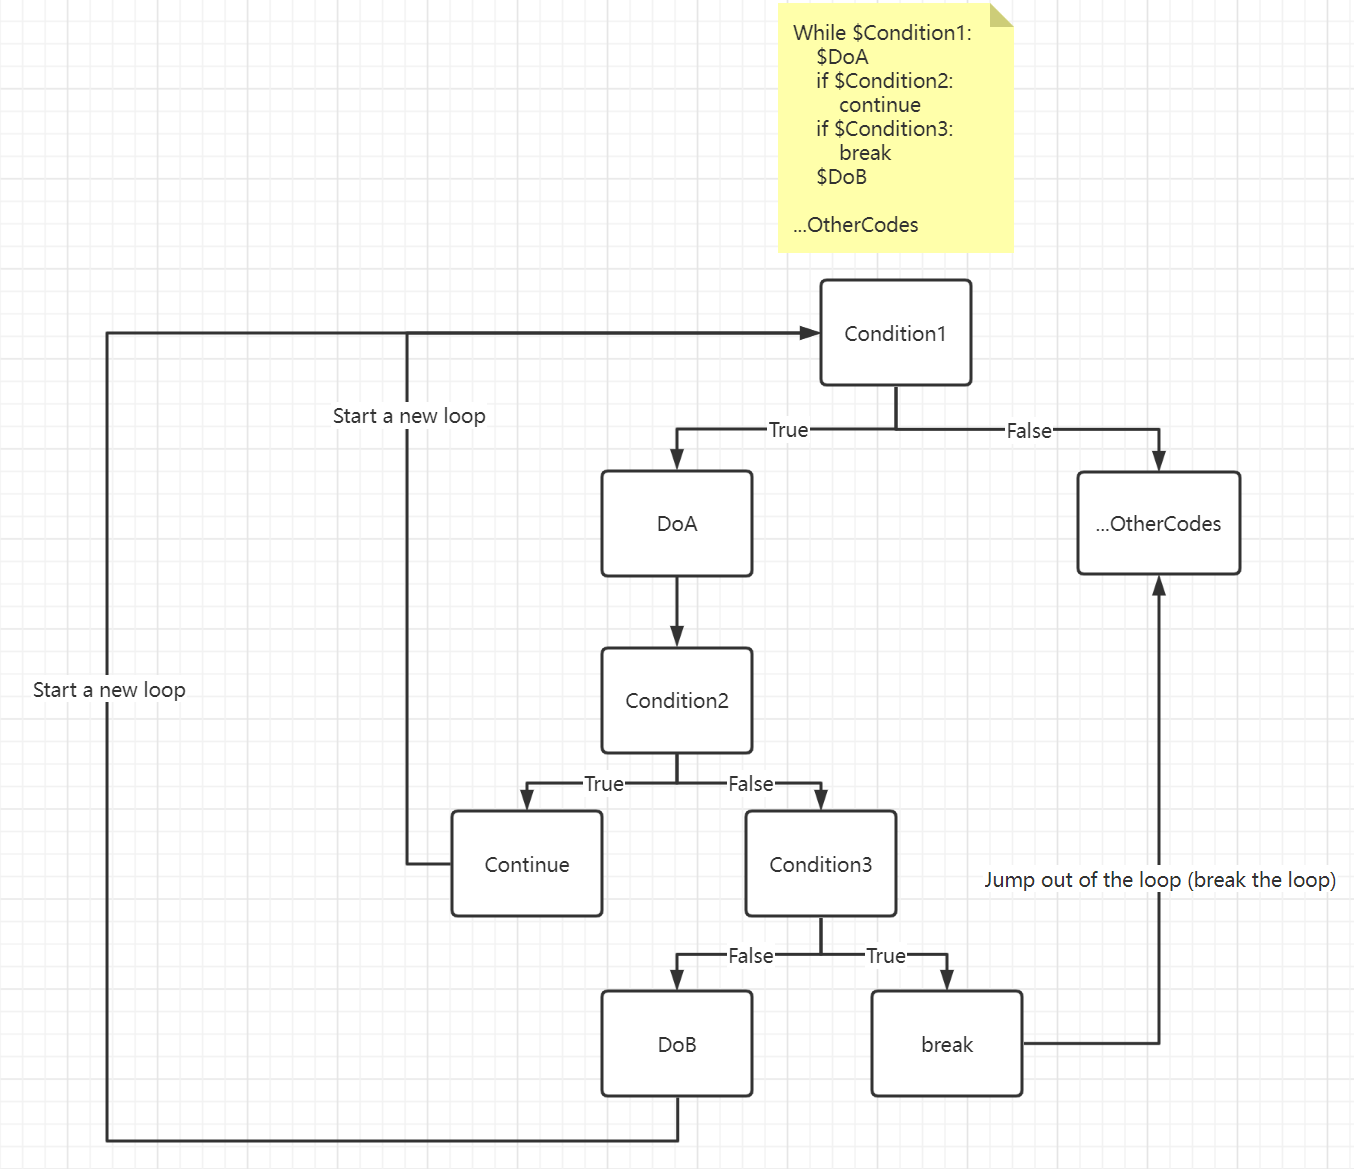
如果我们希望提前中断一个循环语句，或者让在当前循环执行到一半时直接进入下一个循环，可以使用`break`和`continue`命令。

In [10]:
count = 0
while count<5:
    print('count is less than 5')
    count += 1
    print(count)
    break # 在此处中断循环

count is less than 5
1


In [12]:
count = 0
while count<5:
    print('count is less than 5')
    count += 1
    continue # 执行到此处时，直接跳入下一次循环
    print(count)
    

count is less than 5
count is less than 5
count is less than 5
count is less than 5
count is less than 5


类似的，在`for`循环中，`continue`和`break`同样适用。

In [36]:
for num in [1,2,3,4,5]: # 每一轮循环中，num的值分别是1,2,3,4,5
    if num==2:
        continue # 当num==2时，直接进入下一轮循环
    print(num)
    if num==4: # 当num==4时，直接中断循环
        break

1
3
4


###  错误捕捉

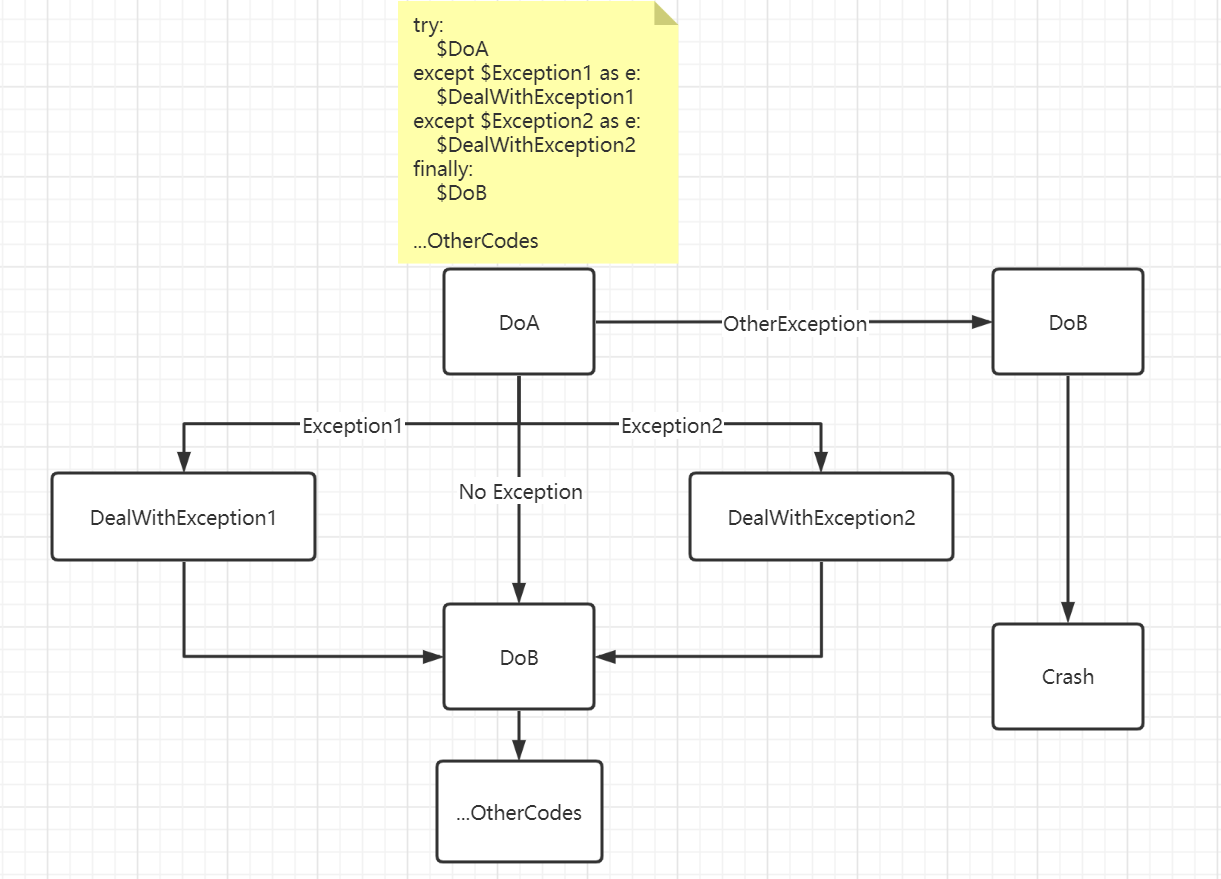

程序员常常在程序中发现三种错误：

1. 意料之内的错误
2. 意料之外的错误
3. 语法错误

其中，语法错误是通过谨慎检查可以避免的。意料之内的错误常出现于与用户交互的时候，比如我们希望用户输入0或1这样的整数，但用户输入了“零”或“一”这样的字符串。这种错误是可以预料到的。而意料之外的错误则是我们未曾设想的错误，这种错误一旦发生，往往会导致我们的程序出现逻辑问题，因此不得不中断程序的运行。

Python提供了`try...except...as...`方法来帮我们捕捉错误。

In [20]:
int('零')
print('...OtherCodes')

ValueError: invalid literal for int() with base 10: '零'

In [40]:
try:
    int('零') # 将“零”强行转化为整数会出现ValueError
except ValueError as e: # 捕捉可能出现的错误
    print(e)
    print('[Attention] A ValueError occurs, please check the input')
print('...OtherCodes')

invalid literal for int() with base 10: '零'
[Attention] A ValueError occurs, please check the input
...OtherCodes


我们可以通过`BaseException`来捕捉所有错误。这在debug时很方便，因为我们可以实时打印出出错的位置与信息。但在生产环境中，这不是一个好办法，因为它可能让我们忽略掉原本意料之外的错误。

In [39]:
a = '零'
try:
    b = int(a)
except BaseException as e:
    print(type(e))
print('...otherCodes')

<class 'ValueError'>
...otherCodes


如果我们只希望捕捉特定的(意料之内的)错误类型，但是希望在发生意料之外错误时，也能做一些处理，那么可以额外使用`finally`。`finally`下的代码不论是否发生错误、发生任何类型的错误，都会在程序向后运行或者崩溃前被执行。

In [42]:
a = '零'
try:
    a += 1 # 这会引发一个TypeError
except ValueError as e: # 只捕捉了ValueError，其他类型的错误不会被捕捉
    print(e)
finally: # 这里的代码一定会被执行
    print('I have tried to run a += 1')
print('...otherCodes')

can only concatenate str (not "int") to str
I have tried to run a += 1


TypeError: unsupported operand type(s) for +=: 'TypeError' and 'int'

### 练习

我们向顾客发送的调查问卷中，收集了顾客的年龄信息，存到了一个列表中：`['21','22','19','23','十八','19','21','22','23','21','23','22','19','21','22','19','23','22','23','21','19','21','23','19','22','21','22','19','23','21','19','22','二十','23','21','22','19','23','19','22','23','21','23','22','19','21','23','19','22','21','19','21','22','23','19','22','23','21','23','22','19','21']`。

其中有一些非标准数据。我们希望得到顾客的大致平均年龄（非标准数据可以去掉）。